In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### https://www.naftaliharris.com/blog/visualizing-k-means-clustering/


In [3]:
df = pd.read_csv("mall.csv")

In [4]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


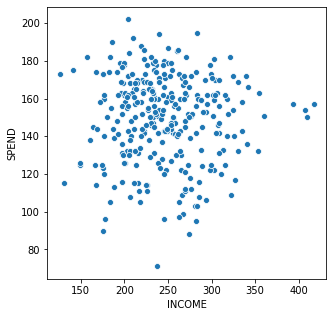

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['INCOME'],df['SPEND'])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
ke1 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=1)
ke1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [8]:
ke1.inertia_

297101.3764201943

In [9]:
centeriods = ke1.cluster_centers_

In [10]:
centeriods

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [11]:
centeriods_df = pd.DataFrame(centeriods,columns=['X','Y'])

In [12]:
centeriods_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


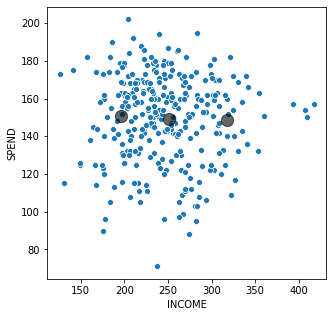

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['INCOME'],df['SPEND'])
plt.scatter(centeriods_df['X'],centeriods_df['Y'],c='black',s=150,alpha=0.6)
plt.show()

In [14]:
bcss=[]
for k in range(1,30):
    ke2= KMeans(n_clusters=k,init="k-means++",n_init=10,max_iter=300,random_state=1)
    ke2.fit(df)
    bcss.append(ke2.inertia_)
    

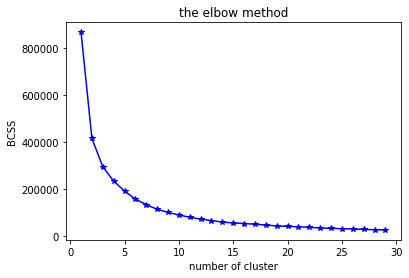

In [15]:
plt.plot(range(1,30),bcss,'b*-')
plt.title('the elbow method')
plt.xlabel('number of cluster')
plt.ylabel('BCSS')
plt.show()

In [16]:
ke3= KMeans(n_clusters=5,init="k-means++",n_init=10,max_iter=300,random_state=1)

In [17]:
labels= ke3.fit_predict(df)

In [18]:
ke3.inertia_

193333.51167275637

In [19]:
centeriods=ke3.cluster_centers_

In [20]:
centeriods

array([[199.38709677, 168.08064516],
       [249.6407767 , 159.75728155],
       [269.94444444, 115.61111111],
       [321.34615385, 153.23076923],
       [196.3       , 126.74      ]])

In [30]:
centeriods_df = pd.DataFrame(centeriods,columns=['X','Y'])
centeriods_df

,X,Y
0,199.387097,168.080645
1,249.640777,159.757282
2,269.944444,115.611111
3,321.346154,153.230769
4,196.300000,126.740000


In [31]:
df_new = pd.concat([df,pd.DataFrame({'labels':labels})],axis=1)

In [32]:
df_new

,INCOME,SPEND,labels
0,233,150,1
1,250,187,1
2,204,172,0
3,236,178,1
4,354,163,3
...,...,...,...
298,241,123,2
299,264,132,2
300,193,141,4
301,131,115,4


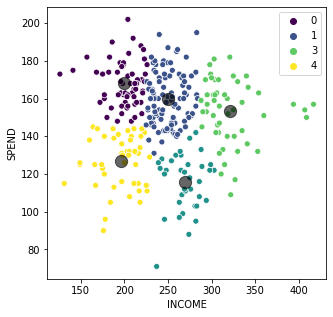

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['INCOME'],y=df['SPEND'],hue=labels,palette='viridis')
plt.scatter(centeriods_df["X"],centeriods_df["Y"], c='black',s=150, alpha=0.6)
plt.show()